# Homework 1: Data Analysis Basics

## Problem

Obtain the CSV (comma separated variable) file containing the counts of bicycles crossing the Fremont Bridge since 2012 (as described in https://data.seattle.gov/browse?category=Transportation&limitTo=datasets&utf8=%E2%9C%93). Create directories for data and analysis. Download the data from https://data.seattle.gov/resource/4xy5-26gy.csv put it in the data directory. Create an iPython Notebook to analyze these data called 'Homework1.ipynb'. In the notebook: (1) Select the 2015 data, creating a new dataframe with fields for date, hour, and count, and use these data in questions (2)-(4); (2) use python matplotlib to plot the counts by hour; (3) compute the hourly average counts; and (4) determine what is the busiest hour of the day.

## Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# load data
data = pd.read_csv('4xy5-26gy.csv ')
data.head(10)

,date,fremont_bridge_nb,fremont_bridge_sb
0,2017-01-09T06:00:00.000,55,28
1,2017-01-04T20:00:00.000,10,19
2,2017-01-18T13:00:00.000,18,18
3,2017-01-06T11:00:00.000,15,22
4,2017-01-27T11:00:00.000,38,39
5,2017-01-08T14:00:00.000,10,6
6,2017-01-06T23:00:00.000,3,8
7,2017-01-27T13:00:00.000,35,45
8,2017-01-18T03:00:00.000,0,1
9,2017-01-01T08:00:00.000,2,3


In [2]:
# question 1
time = pd.DatetimeIndex(data.date)
data['date'] = time.date
data['hour'] = time.time
data['year'] = time.year
data['count'] = data['fremont_bridge_nb'] + data['fremont_bridge_sb']
data_2015 = data[data.year == 2015]
del data_2015['year']
del data_2015['fremont_bridge_nb']
del data_2015['fremont_bridge_sb']
data_2015.head(10)

,date,hour,count
18,2015-11-15,02:00:00,0
27,2015-11-29,04:00:00,0
215,2015-11-21,02:00:00,0
336,2015-11-08,02:00:00,0
578,2015-11-08,04:00:00,0
619,2015-11-10,01:00:00,0
782,2015-12-18,21:00:00,24
783,2015-12-02,23:00:00,20
784,2015-12-13,03:00:00,4
785,2015-12-28,11:00:00,32


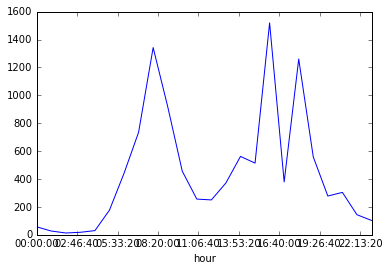

In [5]:
# question 2
count_by_hour = data_2015.groupby(data_2015.hour)['count'].sum()
%matplotlib inline
count_by_hour.plot()

In [7]:
# question 3
avgc_by_hour = data_2015.groupby(data_2015.hour)['count'].mean()
avgc_by_hour

hour
00:00:00      7.125000
01:00:00      2.700000
02:00:00      1.083333
03:00:00      2.000000
04:00:00      3.000000
05:00:00     19.666667
06:00:00     63.000000
07:00:00    122.500000
08:00:00    191.714286
09:00:00    102.111111
10:00:00     65.142857
11:00:00     36.571429
12:00:00     35.714286
13:00:00     53.142857
14:00:00     62.444444
15:00:00     64.250000
16:00:00    138.090909
17:00:00     94.750000
18:00:00    140.000000
19:00:00     46.500000
20:00:00     27.800000
21:00:00     21.714286
22:00:00     16.000000
23:00:00     12.875000
Name: count, dtype: float64

In [16]:
avgc_by_hour.index[avgc_by_hour == max(avgc_by_hour)]

Index([08:00:00], dtype='object', name='hour')